# Milestones 1 P2

## Introduction

Nama: Nadhifa Safira
Batch: HACK006

Problem Statement:

``` In Q4 of 2023, StyleEase aims to minimize the risk of a customer churn. ```

Objective:

StyleEase's objective is to reduce the likelihood of a customer churning, which means that they are trying to prevent customers from leaving the platform or discontinuing the use of their products and services. As a data scientist in this position, my responsibility is to develop a predictive model using the available data to identify potential churned customers.

Background:

StyleEase is a clothing subscription box service that offers a seamless and hassle-free shopping experience for everyday casual attires. With StyleEase, customers can enjoy the convenience of having a personal stylist curate a selection of trendy and comfortable clothing items tailored to their style preferences. It's a one-stop solution for upgrading your wardrobe with trendy and comfortable pieces, making it easier than ever to stay fashionable and stylish in your everyday life.

url: ```https://huggingface.co/spaces/nadhifarares/DeployML1P2```

## Import Library

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

#For Modelling
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import plot_model

#Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay

#Model Evaluation
from sklearn.metrics import confusion_matrix ,accuracy_score, roc_curve,roc_auc_score,precision_score, recall_score, classification_report, f1_score

#Model Saving
import joblib

np.random.seed(50)
tf.random.set_seed(50)


import warnings
warnings.filterwarnings(action='ignore')

## Data Loading & Overview

In [2]:
df = pd.read_csv('/Users/nadhifarares/Documents/FTDS/MILESTONES/ML1P2/churn.csv', parse_dates=['joining_date'])

In [3]:
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
df.drop(['user_id', 'joining_date'], inplace=True, axis=1)
 #dropping the user_id and joining_date to make it easier to do eda. user_id only contains the id of a customers

In [5]:
df.head(10) #the first 10 data

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,29,F,NaN,No Membership,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,50,M,NaN,Basic Membership,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,26,F,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,63,F,Village,No Membership,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,64,M,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,35,M,Town,Premium Membership,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,43,M,NaN,Gold Membership,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,15,M,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,49,M,Town,Platinum Membership,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,35,F,Town,Basic Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [6]:
df.tail(10) #the last 10 data

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,25,F,Town,No Membership,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,38,M,Town,Silver Membership,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,49,F,City,No Membership,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,42,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,19,F,Town,Gold Membership,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,36,M,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,27,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,20,M,NaN,Gold Membership,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,38,F,City,Gold Membership,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,36,M,Town,Gold Membership,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [7]:
df.info() #see the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           37010 non-null  int64  
 1   gender                        36951 non-null  object 
 2   region_category               31579 non-null  object 
 3   membership_category           37010 non-null  object 
 4   joined_through_referral       31568 non-null  object 
 5   preferred_offer_types         36722 non-null  object 
 6   medium_of_operation           31615 non-null  object 
 7   internet_option               37010 non-null  object 
 8   last_visit_time               37010 non-null  object 
 9   days_since_last_login         37010 non-null  int64  
 10  avg_time_spent                37010 non-null  float64
 11  avg_transaction_value         37010 non-null  float64
 12  avg_frequency_login_days      37010 non-null  float64
 13  p

In [8]:
df.isnull().sum() #checking whether the data has missing values

age                                0
gender                            59
region_category                 5431
membership_category                0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

It contains numerous missing values in several columns, and we plan to fill these missing values with the mode since the high number of missing entries could potentially impact the data if we simply drop them.

In [9]:
#Impute missing values with Mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['region_category'].fillna(df['region_category'].mode()[0], inplace=True)
df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0], inplace=True)
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace=True)
df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0], inplace=True)

In [10]:
df.isnull().sum() #rechecking the missing values

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [11]:
df.describe() #oversee a statistical data based on the data

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Insights:
1. The average time customers spend on our website is approximately 279.201356 hours.
2. The total number of days customers log onto our website is 14 days.
3. A majority of our customers fall within the age range of around 37 years.

In [12]:
df.duplicated().sum() #check if theres any duplicated data

18

There are 18 duplicated data throughout the dataset.

In [13]:
df.drop_duplicates(inplace=True) #drop the duplicates so there wont be any duplicates data anymore
df.duplicated().sum()

0

In [14]:
df.shape #to check how many columns and row are in the dataset

(36992, 20)

In [15]:
df.columns #to see all of the columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [16]:
#Splitting between numericals and categoricals columns
cat_cols = df[['gender','region_category', 'membership_category', 'joined_through_referral','preferred_offer_types','medium_of_operation', 'internet_option','used_special_discount', 'offer_application_preference','past_complaint','complaint_status','feedback']]

num_cols = df[['age','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet','churn_risk_score']]

In [17]:
#Categorical Overview
for i in cat_cols:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

gender

F    18549
M    18443
Name: gender, dtype: int64
----------
region_category

Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64
----------
membership_category

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64
----------
joined_through_referral

No     21277
Yes    15715
Name: joined_through_referral, dtype: int64
----------
preferred_offer_types

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
----------
medium_of_operation

Desktop       19306
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64
----------
internet_option

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64
----------
used_special_discount

Yes    2034

The number of female StyleEase customers exceeds that of males, and the majority of them are using a basic membership subscription. 

## EDA

In [18]:
#make a copy data frame for eda purposes
df2 = df.copy()

In [19]:
cat_cols.describe() #oversee statistical data for categorical columns

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,2,3,6,2,3,3,3,2,2,2,5,9
top,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18549,19556,7724,21277,12637,19306,12413,20342,20440,18602,18602,6350


Insights:
1. The majority of our customers are female.
2. Most of them have not subscribed to any plans.
3. They predominantly access our website using desktop devices.
4. The majority of customers have utilized special discounts.
5. The primary concern raised by some customers in their feedback is our poor product quality.

In [20]:
num_cols.describe() #oversee statistical data for numerical columns

,age,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,279.147450,29271.194003,14.658617,623.562421,0.540982
std,15.867412,329.947709,19444.806226,9.479184,270.263994,0.498324
min,10.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,60.102500,14177.540000,7.000000,574.135000,0.000000
50%,37.000000,161.765000,27554.485000,14.000000,680.370000,1.000000
75%,51.000000,356.515000,40855.110000,22.000000,757.002500,1.000000
max,64.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Insights:
1. The customer age range spans from 10 to 64 years, with an average age of approximately 37 years.
2. The average time customers spend on the website is about 279 hours.
3. Customers log in an average of around 14.66 times, with some logging in as frequently as 73.06 times.
4. Customers hold an average of approximately 623.56 points in their wallets, with some customers accumulating up to 2069.07 points.
5. The average transaction value is approximately 29,271.19.

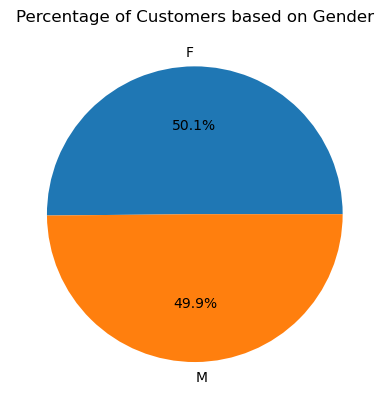

In [21]:
#Visualizing the percentages of customers based on gender
#Count the unique values of 'gender'
value_counts = df2['gender'].value_counts()

#Create a pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')

#Add a title
plt.title('Percentage of Customers based on Gender')

#Display the chart
plt.show()

The data suggests that the customer distribution by gender is relatively even, with only a slight difference between males and females.

In [22]:
df2.age.unique() #To see unique values in age columns

array([29, 50, 26, 63, 64, 35, 43, 15, 49, 53, 33, 24, 36, 23, 40, 27, 48,
       54, 62, 28, 59, 19, 18, 47, 32, 57, 52, 61, 12, 30, 22, 41, 58, 60,
       11, 17, 14, 51, 39, 56, 34, 16, 21, 10, 55, 13, 25, 46, 20, 44, 31,
       38, 37, 42, 45])

In [23]:
#the process of sorting numbers to conduct an encoding
numbers = [29, 50, 26, 63, 64, 35, 43, 15, 49, 53, 33, 24, 36, 23, 40, 27, 48,
           54, 62, 28, 59, 19, 18, 47, 32, 57, 52, 61, 12, 30, 22, 41, 58, 60,
           11, 17, 14, 51, 39, 56, 34, 16, 21, 10, 55, 13, 25, 46, 20, 44, 31,
           38, 37, 42, 45]

#sort numbers by ascending
sorted_numbers = sorted(numbers)

print(sorted_numbers)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [24]:
#process to encode the age into 3 different age group
agegroup = []

for agr1 in df2['age']:
    if agr1 in [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,]:
        agegroup.append('Adults')
    elif agr1 in [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]:
        agegroup.append('Teenagers & Young Adults')
    else:
        agegroup.append('50s and 60s')

df2['age'] = agegroup

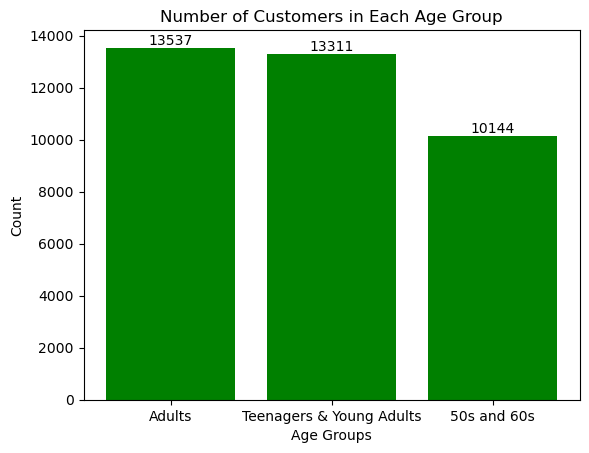

In [25]:
#value counts of each age group
age_group_counts = df2['age'].value_counts()

#Create a bar plot
plt.bar(age_group_counts.index, age_group_counts.values, color='green')

#Add x-axis label and y-axis label
plt.xlabel('Age Groups')
plt.ylabel('Count')

#Add a title
plt.title('Number of Customers in Each Age Group')

#Display the numbers on the bars
for index, value in enumerate(age_group_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

#Display the chart
plt.show()

The majority of StyleEase customers fall within the adult age group, ranging from 30 to 49 years old.

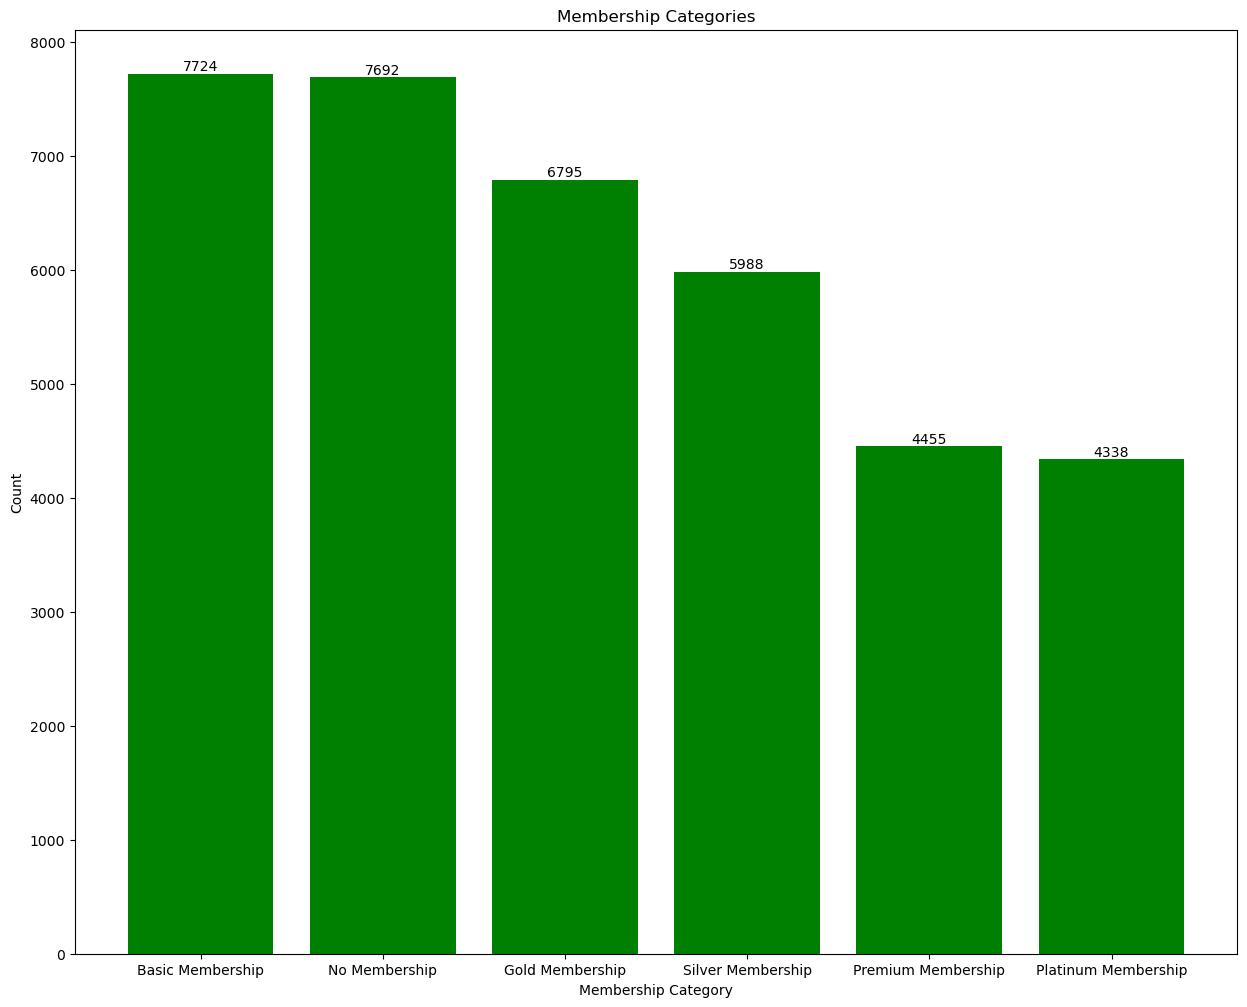

In [26]:
#Count the occurrences of each membership category
memb = df2['membership_category'].value_counts()

#Set the figure size
plt.figure(figsize=(15, 12))

#Create a bar plot
plt.bar(memb.index, memb.values, color='green')

#Add x-axis label and y-axis label
plt.xlabel('Membership Category')
plt.ylabel('Count')

#Add a title
plt.title('Membership Categories')

for index, value in enumerate(memb.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

#Display the chart
plt.show()

The majority of customers do not subscribe to a paid membership; instead, most of them utilize either the basic membership or opted for no membership at all.

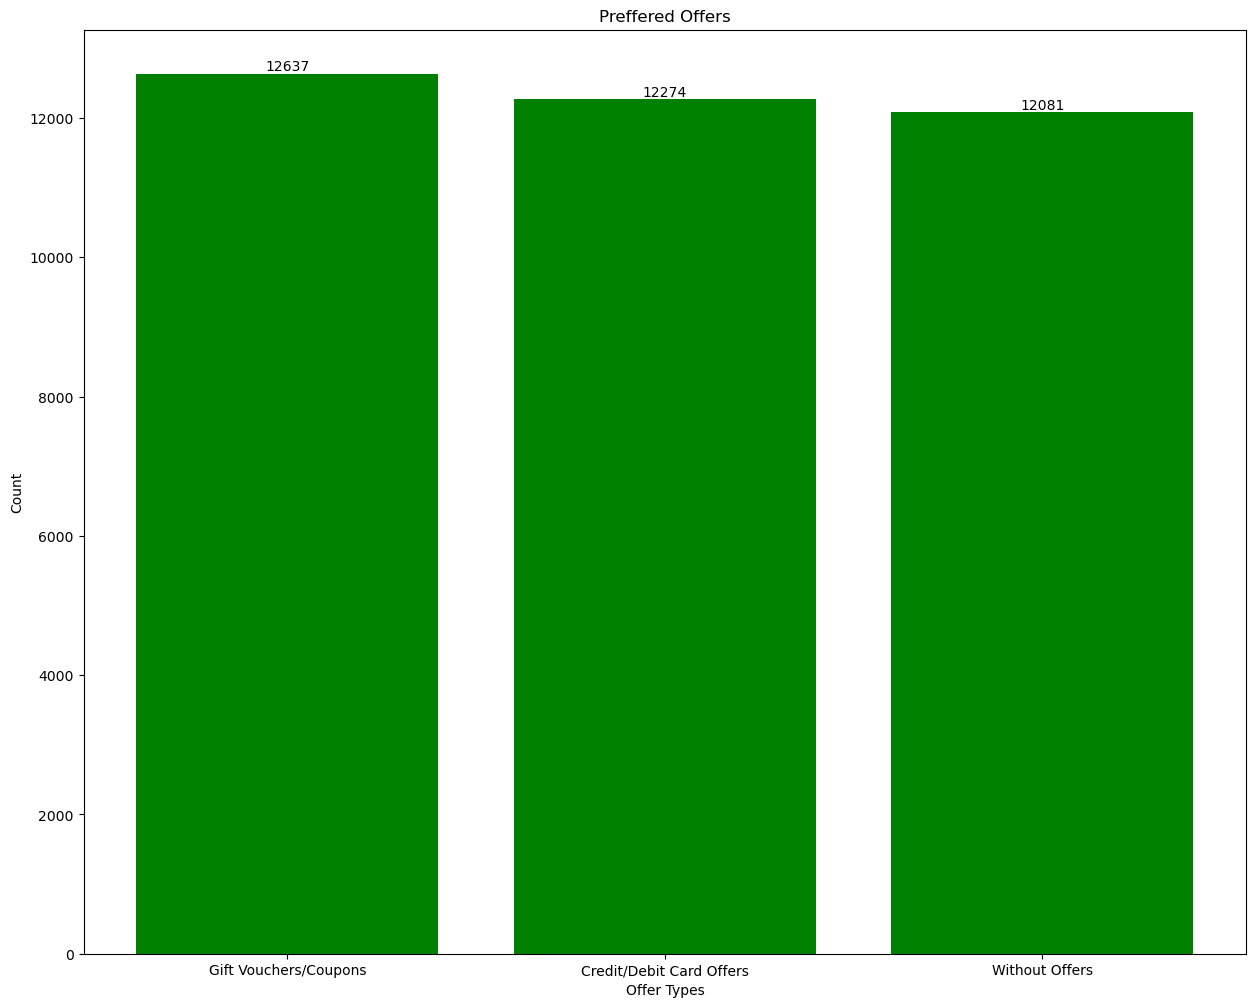

In [27]:
#Count the occurrences of each preferred offer types
offer = df2['preferred_offer_types'].value_counts()

#Set the figure size
plt.figure(figsize=(15, 12))

#Create a bar plot
plt.bar(offer.index, offer.values, color='green')

#Add x-axis label and y-axis label
plt.xlabel('Offer Types')
plt.ylabel('Count')

#Add a title
plt.title('Preffered Offers')

#Shows the exact number on the bars
for index, value in enumerate(offer.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

#Display the chart
plt.show()

It does not reveal any substantial differences when comparing customers who preferred gift vouchers and coupons, credit/debit card offers, and those without offers. The data distributions for these groups are similar, indicating that their preferences and behaviors do not show significant variations. 

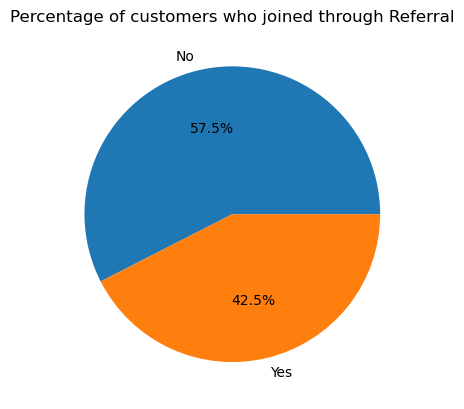

In [28]:
#Visualizing the percentages of customers did they join through referral or not
#Count the unique values of 'referral'
value_counts_ref = df2['joined_through_referral'].value_counts()

#Create a pie chart
plt.pie(value_counts_ref.values, labels=value_counts_ref.index, autopct='%1.1f%%')

#Add a title
plt.title('Percentage of customers who joined through Referral')

#Display the chart
plt.show()

More than half of the customers became members of StyleEase without using a referral code, while the remaining customers did provide a referral code during their sign-up process. This suggests that a significant portion of the customer base joined the platform without any direct referral, while others might have been influenced or referred by existing customers using referral codes.

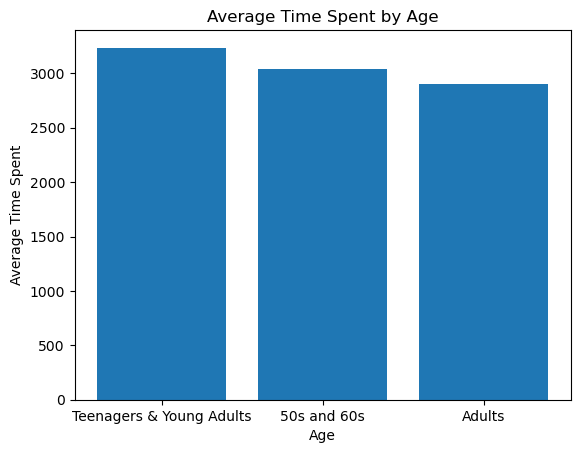

In [29]:
#Create a bar plot to show average time spent for each category
plt.bar(df2['age'], df2['avg_time_spent'])
plt.xlabel('Age')
plt.ylabel('Average Time Spent')
plt.title('Average Time Spent by Age')
plt.show()

Based on the data, we can conclude that the age group of Teenagers and Young Adults, specifically those between the ages of 10 to 29, tend to spend the most extended periods of time scrolling through the StyleEase website. This finding indicates that this particular age group shows higher engagement and interest in exploring the offerings and content on the website compared to other age groups.

In [30]:
#To see how many of the customers who churned
df2['churn_risk_score'].value_counts()

1    20012
0    16980
Name: churn_risk_score, dtype: int64

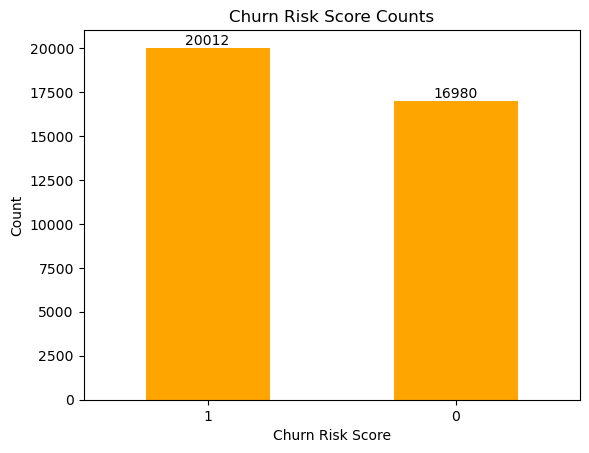

In [31]:
#Count the occurrences of each churn risk score
churn_risk_counts = df2['churn_risk_score'].value_counts()

#Create a bar plot with x-axis labels rotated 90 degrees
churn_risk_counts.plot(kind='bar', color='orange')
plt.xticks(rotation=0)

#Add x-axis label and y-axis label
plt.xlabel('Churn Risk Score')
plt.ylabel('Count')

#Add a title
plt.title('Churn Risk Score Counts')

#Display the numbers on the bars
for index, value in enumerate(churn_risk_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Display the chart
plt.show()

The data exhibits a nearly equal proportion between customers who churned (0) and customers who didn't churn (1), signifying a relatively balanced distribution of both categories.

In [32]:
#Group the DataFrame by 'gender' and count the occurrences of churn
churn_counts_by_gender = df2.groupby('gender')['churn_risk_score'].sum()

print(churn_counts_by_gender)

gender
F    10078
M     9934
Name: churn_risk_score, dtype: int64


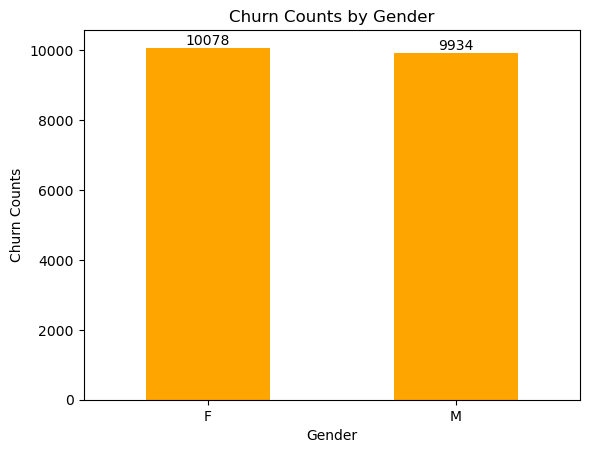

In [33]:
#Group the DataFrame by 'gender' and count the occurrences of churn
churn_counts_by_gender = df2.groupby('gender')['churn_risk_score'].sum()

#Create a bar plot with x-axis labels rotated 90 degrees
churn_counts_by_gender.plot(kind='bar', color='orange')
plt.xticks(rotation=0)

#Add x-axis label and y-axis label
plt.xlabel('Gender')
plt.ylabel('Churn Counts')

#Add a title
plt.title('Churn Counts by Gender')

#Shows the exact number on the bars
for index, value in enumerate(churn_counts_by_gender.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

#Display the chart
plt.show()

Females have the highest number of churn cases at the moment compared to males. However, the number of churn cases for males is also considerably high and not significantly lower than that of females.

In [34]:
#Group the DataFrame by 'age' and count the occurrences of churn
churn_counts_by_age = df2.groupby('age')['churn_risk_score'].sum()

print(churn_counts_by_age)

age
50s and 60s                 5528
Adults                      7351
Teenagers & Young Adults    7133
Name: churn_risk_score, dtype: int64


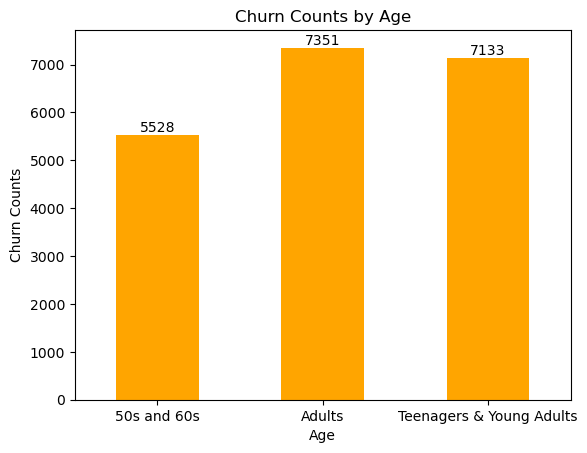

In [35]:
#Group the DataFrame by 'age' and count the occurrences of churn
churn_counts_by_age = df2.groupby('age')['churn_risk_score'].sum()

#Create a bar plot with x-axis labels rotated 0 degrees
churn_counts_by_age.plot(kind='bar', color='orange')
plt.xticks(rotation=0)

#Add x-axis label and y-axis label
plt.xlabel('Age')
plt.ylabel('Churn Counts')

#Add a title
plt.title('Churn Counts by Age')

#Shows the exact number on the bars
for index, value in enumerate(churn_counts_by_age.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

#Display the chart
plt.show()

When we analyze customers who churned by age, it becomes evident that the age group of adults aged 30-49 has the highest churn rates compared to other age groups.

In [36]:
 #To see what are the customers been complaining of
feedbacks = df2.groupby('feedback')['churn_risk_score'].sum().sort_values(ascending=False)
feedbacks

feedback
Poor Product Quality        4127
No reason specified         3994
Poor Customer Service       3992
Poor Website                3962
Too many ads                3937
Products always in Stock       0
Quality Customer Care          0
Reasonable Price               0
User Friendly Website          0
Name: churn_risk_score, dtype: int64

From the feedback received by StyleEase over the past year, the majority of customers have expressed concerns regarding various aspects. These concerns include:

1. Poor Product Quality
2. No Reason Specified
3. Poor Customer Service
4. Poor Website
5. Too Many Ads

Analyzing and addressing these feedbacks can help StyleEase identify areas for improvement and enhance customer satisfaction and loyalty.

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


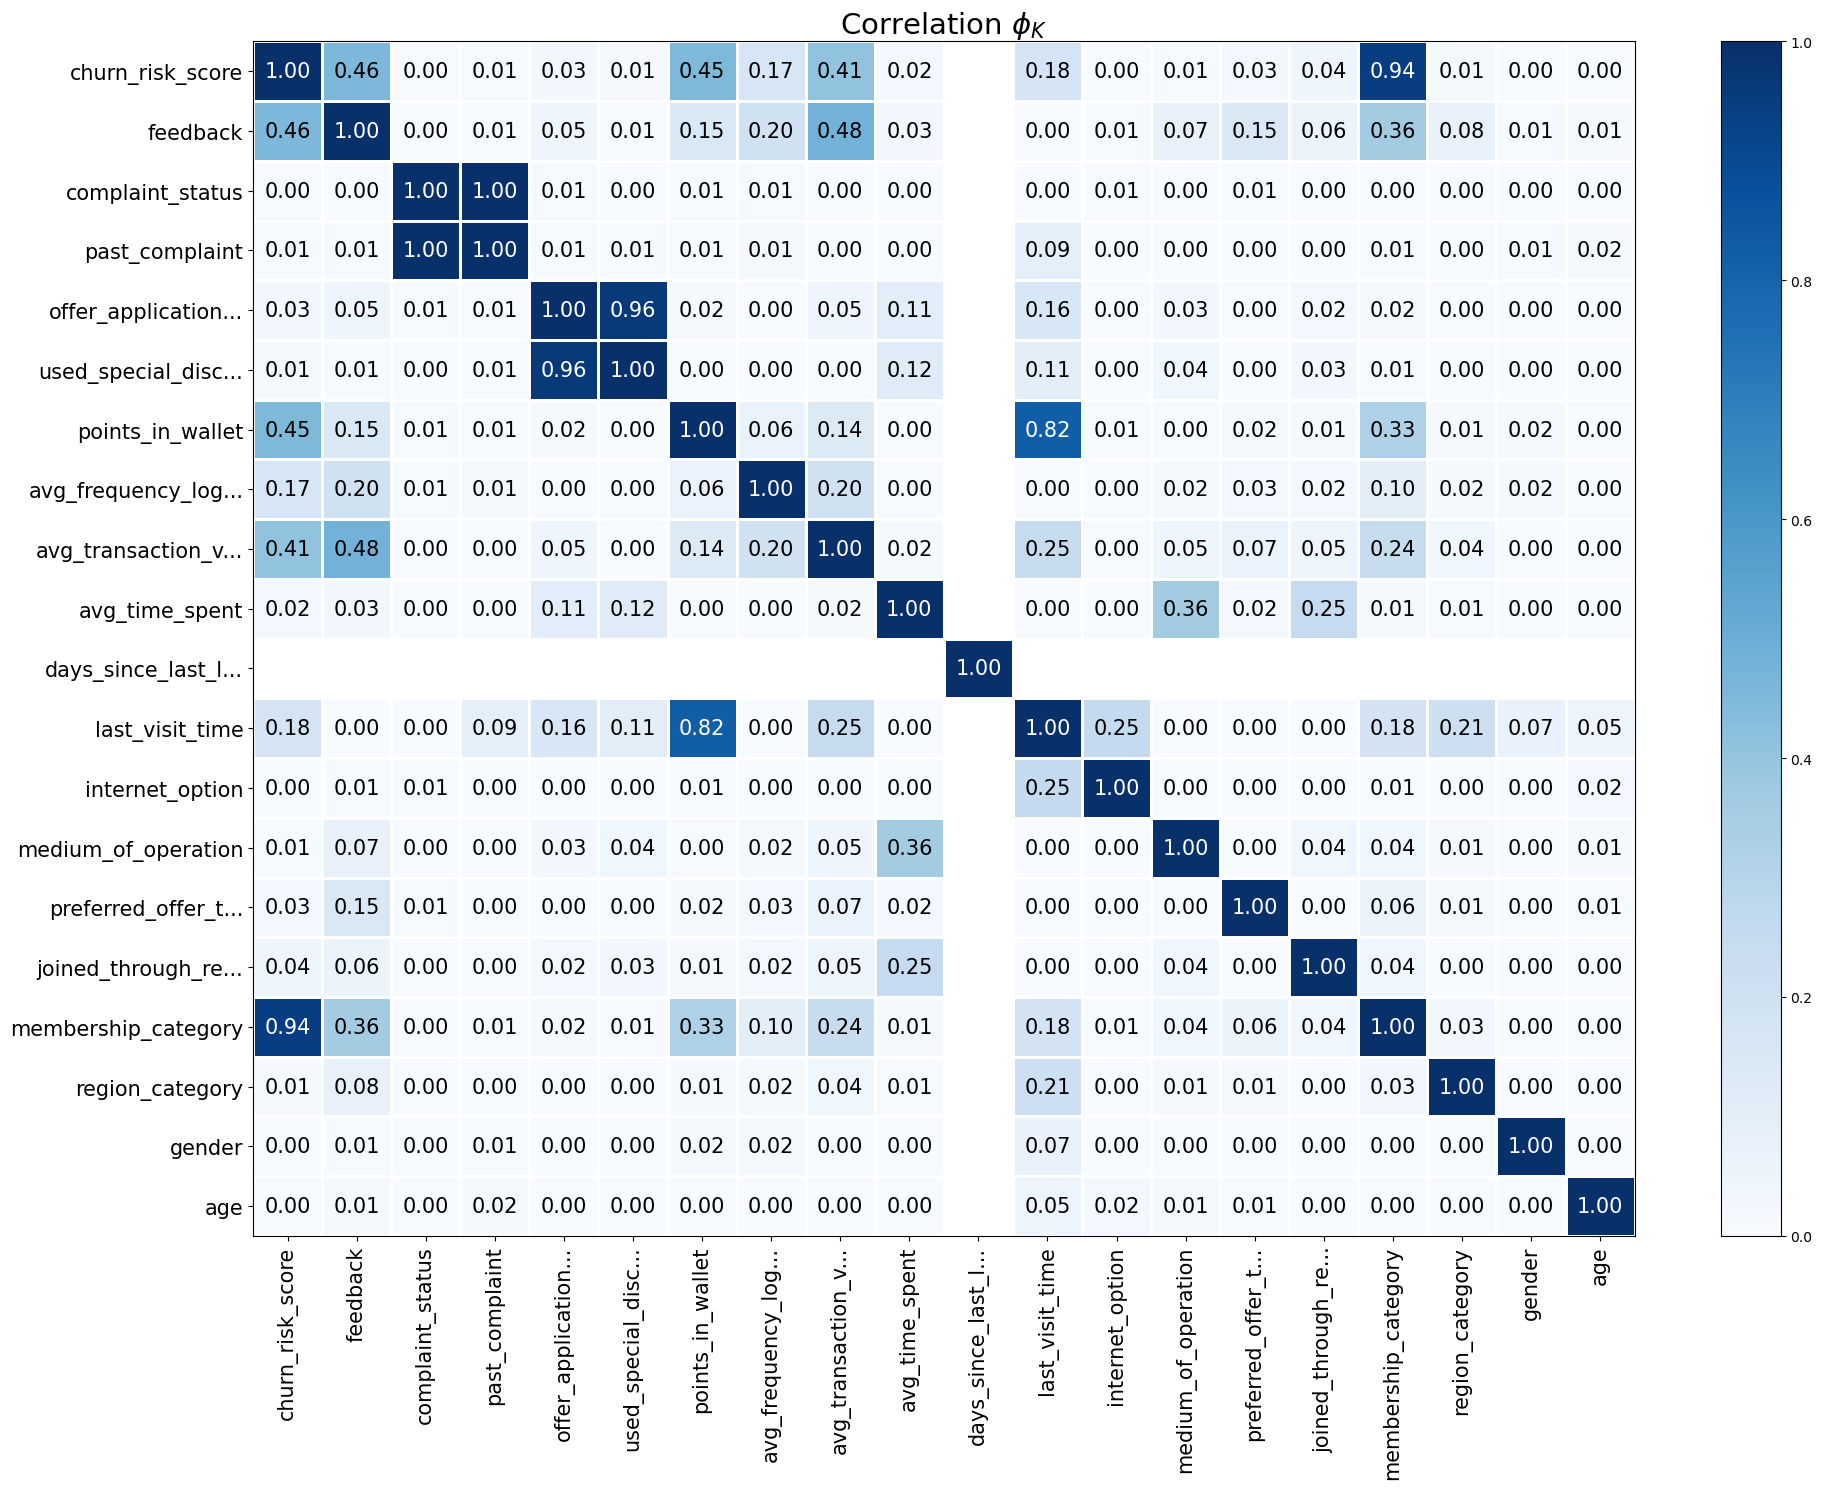

In [37]:
#Examining the correlation between features using phik correlation.
plot_correlation_matrix(df.phik_matrix().values, 
                         x_labels=df.phik_matrix().columns, 
                         y_labels=df.phik_matrix().index, 
                         vmin=0, vmax=1, color_map="Blues", 
                         title=r"Correlation $\phi_K$", 
                         fontsize_factor=1.5, 
                         figsize=(20, 15))
plt.tight_layout()

Based on Phik Correlation, the columns that has the highest correlation with 'churn_risk_score' are 'feedback', 'points_in_wallet', 'avg_transaction_value', and 'membership_category'. Therefore analyst will use these columns as a feature in feature selections.

## Feature Selection

In [38]:
#Selecting new columns based on the highest correlation.
df_select = df[['feedback', 'points_in_wallet', 'avg_transaction_value', 'membership_category','churn_risk_score' ]]
df_select

,feedback,points_in_wallet,avg_transaction_value,membership_category,churn_risk_score
0,Poor Website,627.48,38604.69,No Membership,1
1,Poor Customer Service,575.97,7665.66,Basic Membership,1
2,Too many ads,767.93,37671.69,Silver Membership,0
3,Too many ads,590.22,15678.14,No Membership,1
4,Poor Product Quality,722.04,8422.68,Silver Membership,0
...,...,...,...,...,...
37005,User Friendly Website,846.52,29455.29,Gold Membership,0
37006,Reasonable Price,835.98,27038.47,Gold Membership,0
37007,Poor Customer Service,714.90,39305.35,Gold Membership,0
37008,Poor Website,744.99,46108.73,Gold Membership,0


In [39]:
#Checking cardinality
df_select[['feedback', 'membership_category']].nunique()

feedback               9
membership_category    6
dtype: int64

The categorical data has a relatively low cardinality.

In [40]:
df_select.isnull().sum() #Rechecking if there's any missing values

feedback                 0
points_in_wallet         0
avg_transaction_value    0
membership_category      0
churn_risk_score         0
dtype: int64

### Outliers

In [41]:
#Outliers handling
def diagnostic_plots(df_select, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_select[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_select[variable])
    plt.title('Boxplot')

    plt.show()

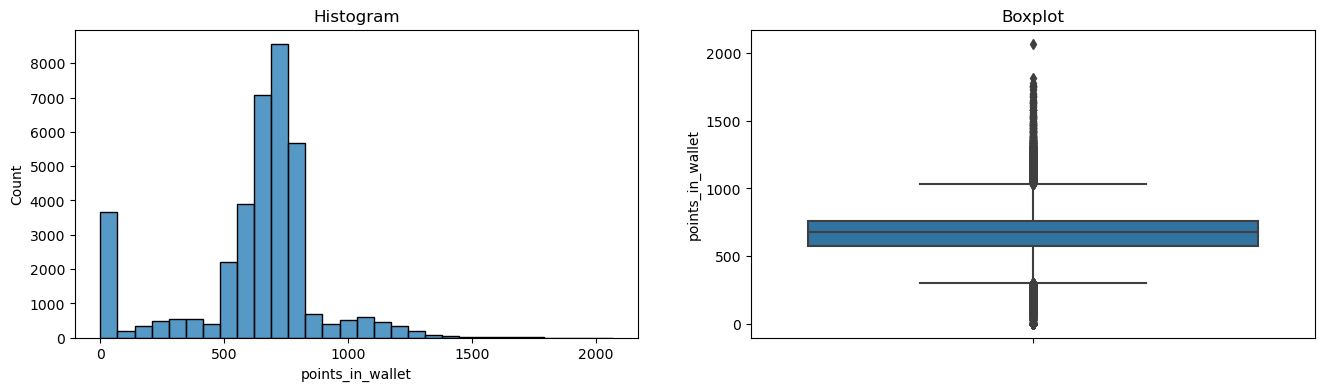


Skewness Value :  -0.7734917908458531


In [42]:
#Checking if there's any outliers in column 'points_in_wallet'
diagnostic_plots(df_select, 'points_in_wallet')
print('\nSkewness Value : ', df_select['points_in_wallet'].skew())

The 'points_in_wallet' column contains numerous outliers, and its distribution is visibly left-skewed, as indicated by the negative skewness value.

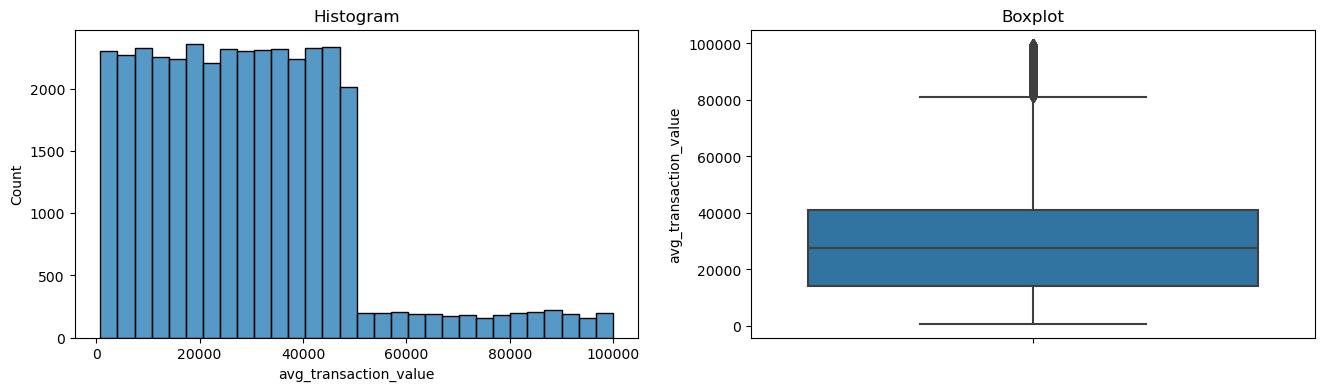


Skewness Value :  1.0110271627457472


In [43]:
#Checking if there's any outliers in column 'avg_transaction_value'
diagnostic_plots(df_select, 'avg_transaction_value')
print('\nSkewness Value : ', df_select['avg_transaction_value'].skew())

Regarding the 'avg_transaction_value,' there are numerous outliers, and the distribution is slightly skewed towards the right, as indicated by the skewness value exceeding 1.

## Split

In [44]:
# Split between X as features and Y as target

X = df_select.drop('churn_risk_score', axis=1)
y = df_select['churn_risk_score']
X

,feedback,points_in_wallet,avg_transaction_value,membership_category
0,Poor Website,627.48,38604.69,No Membership
1,Poor Customer Service,575.97,7665.66,Basic Membership
2,Too many ads,767.93,37671.69,Silver Membership
3,Too many ads,590.22,15678.14,No Membership
4,Poor Product Quality,722.04,8422.68,Silver Membership
...,...,...,...,...
37005,User Friendly Website,846.52,29455.29,Gold Membership
37006,Reasonable Price,835.98,27038.47,Gold Membership
37007,Poor Customer Service,714.90,39305.35,Gold Membership
37008,Poor Website,744.99,46108.73,Gold Membership


In [45]:
#Checking if the y data is imbalance or not
y.value_counts()

1    20012
0    16980
Name: churn_risk_score, dtype: int64

In [46]:
#Assigning train size and test size
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=17)

print('Train Size : ', X_train_full.shape)
print('Test Size  : ', y_train_full.shape)

Train Size :  (27744, 4)
Test Size  :  (27744,)


In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                   y_train_full,
                                                   shuffle=True, test_size=0.2, stratify= y_train_full)

## Preprocessing

In [48]:
#Trimming outliers and scaling

#Numerical Pipeline
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)), 
        ('scaler', MinMaxScaler())
    ]) 

#Fold 3 because the outliers were slightly extreme, and using 'IQR' along with minmaxscaler for skewed. 

#Fit transform numerical pipeline 
num_tr = num_pipe.fit_transform(X_train[['points_in_wallet','avg_transaction_value']])
num_tr

array([[0.5272949 , 0.08026712],
       [0.42590153, 0.19936104],
       [0.5171093 , 0.36070641],
       ...,
       [0.27123739, 0.04242833],
       [0.        , 0.24136993],
       [0.46991367, 0.31829241]])

In [49]:
#Encoding on categorical pipe - feedback
cat1_pipe = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('cat_ohe', OneHotEncoder(sparse=False)) 
    ])
#I used onehot encoder because the data doesn't have a rank and order.

cat_tr1 = cat1_pipe.fit_transform(X_train[['feedback']])
cat_tr1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
##Encoding on categorical pipe - membership_category
cat2_pipe = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('cat_ord', OrdinalEncoder(categories=[['No Membership', 'Basic Membership', 'Silver Membership',
       'Premium Membership', 'Gold Membership', 'Platinum Membership']])) 
    ])
#I used ordinal encoder simply because the data has inherent order or ranking among them.

cat2_tr = cat2_pipe.fit_transform(X_train[['membership_category']])
cat2_tr

array([[0.],
       [0.],
       [4.],
       ...,
       [5.],
       [0.],
       [4.]])

In [51]:
#Combine the three pipeline with ColumnTransformer
full_pipe = ColumnTransformer([
        ("num", num_pipe, ['points_in_wallet','avg_transaction_value']),
        ("cat_ohe", cat1_pipe, ['feedback']),
        ("cat_ord", cat2_pipe, ['membership_category']),
    ])

train_tr = full_pipe.fit_transform(X_train)
train_tr

array([[0.5272949 , 0.08026712, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42590153, 0.19936104, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5171093 , 0.36070641, 0.        , ..., 0.        , 0.        ,
        4.        ],
       ...,
       [0.27123739, 0.04242833, 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.        , 0.24136993, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46991367, 0.31829241, 0.        , ..., 0.        , 0.        ,
        4.        ]])

In [52]:
#Extract feature from Pipe
X_train_new = full_pipe.fit_transform(X_train)
X_test_new = full_pipe.transform(X_test)
X_val_new = full_pipe.transform(X_val)

In [53]:
X_train.shape

(22195, 4)

In [54]:
X_train_new

array([[0.5272949 , 0.08026712, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42590153, 0.19936104, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.5171093 , 0.36070641, 0.        , ..., 0.        , 0.        ,
        4.        ],
       ...,
       [0.27123739, 0.04242833, 0.        , ..., 0.        , 0.        ,
        5.        ],
       [0.        , 0.24136993, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46991367, 0.31829241, 0.        , ..., 0.        , 0.        ,
        4.        ]])

## Model

In [55]:
#Pipeline ETL tensorflow
train_set = tf.data.Dataset.from_tensor_slices((X_train_new, y_train))

#Shuffle and slice train dataset.
train_set = train_set.shuffle(buffer_size=712).batch(64)

#Now we get a test dataset.
val_set = tf.data.Dataset.from_tensor_slices((X_val_new, y_val))
val_set = val_set.batch(64)

In [56]:
X_train_new.shape[1:]

(12,)

In this approach, the analyst aims to compare the performance of two different methods for building neural network models: Sequential and Functional API. The Sequential API is a simpler and more straightforward way to construct models by stacking layers sequentially. On the other hand, the Functional API offers greater flexibility and customization options, making it suitable for complex architectures with multiple inputs and outputs, shared layers, and custom connectivity patterns. By evaluating and comparing the models built using these two methods, the analyst can determine which one is more effective in predicting customer churn and provides better generalization to unseen data. This comparison will help in selecting the most suitable approach for the specific task at hand and optimizing the model's performance for the given dataset.

## Sequential

In [57]:
#Sequential
ann = Sequential()
ann.add(Dense(units=30, activation='relu',input_shape=(X_train_new.shape[1:])))
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=1,activation='sigmoid')) 

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Analyst used ReLU as an activation fuction because ReLU is computationally efficient to compute compared to other activation functions, and ReLU can mitigate vanishing issue since it doesn't saturate in the positive region, allowing gradients to flow more easily during backpropagation.

In [58]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

Using callbacks as a stop point to stop the training process early if the model's performance does not improve. This helps prevent overfitting and saves time during training.

In [59]:
hidden1 = ann.layers[1]
hidden1.name

'dense_1'

In [60]:
weights, biases = hidden1.get_weights()
weights

array([[-2.76101708e-01, -9.15725976e-02,  7.55689740e-02,
         1.72307879e-01, -5.76359928e-02, -2.44464114e-01,
        -7.43909925e-02, -2.64059395e-01,  6.88503981e-02,
         1.48375005e-01, -3.57297957e-02,  2.94691771e-01,
        -2.25710988e-01,  2.47018665e-01,  2.48868138e-01,
        -2.38183141e-01,  2.39231855e-01,  9.56687033e-02,
        -1.44168302e-01,  2.09458023e-01,  1.32446110e-01,
         8.12094510e-02, -1.86993465e-01,  2.71085411e-01,
        -1.19144693e-01, -6.98319077e-03,  2.99177557e-01,
         1.45271778e-01,  1.36941493e-01,  2.43866295e-01],
       [ 2.41126686e-01,  4.51674461e-02,  1.83488220e-01,
         1.47268236e-01, -9.73290205e-03, -6.73417598e-02,
        -1.83757305e-01, -6.59992695e-02, -8.65178406e-02,
        -2.53620476e-01,  1.98292941e-01,  2.21291184e-03,
        -1.86659932e-01, -1.06590360e-01,  3.04898232e-01,
         1.06281549e-01,  2.83107251e-01, -2.70831406e-01,
         1.34818256e-02,  2.46739656e-01,  1.14350587e-

In [61]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1351 (5.28 KB)
Trainable params: 1351 (5.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
%pip install pydot #to show the plot below

Note: you may need to restart the kernel to use updated packages.


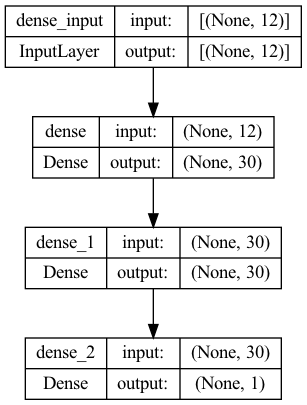

In [63]:
plot_model(ann, show_shapes=True)

In [64]:
X_train_new.shape

(22195, 12)

In [65]:
#Model Train
batch=32

history_ann_seq= ann.fit(train_set,
                         validation_data= (val_set),
                         #validation_split=0.2,
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks1
                         )

Epoch 1/100


347/347 [==============================] - 0s 890us/step - loss: 0.3866 - accuracy: 0.8323 - val_loss: 0.3399 - val_accuracy: 0.8349
Epoch 2/100
347/347 [==============================] - 0s 463us/step - loss: 0.3218 - accuracy: 0.8535 - val_loss: 0.3329 - val_accuracy: 0.8519
Epoch 3/100
347/347 [==============================] - 0s 427us/step - loss: 0.3166 - accuracy: 0.8556 - val_loss: 0.3312 - val_accuracy: 0.8602
Epoch 4/100
347/347 [==============================] - 0s 406us/step - loss: 0.3136 - accuracy: 0.8584 - val_loss: 0.3284 - val_accuracy: 0.8529
Epoch 5/100
347/347 [==============================] - 0s 410us/step - loss: 0.3105 - accuracy: 0.8616 - val_loss: 0.3276 - val_accuracy: 0.8558
Epoch 6/100
347/347 [==============================] - 0s 401us/step - loss: 0.3090 - accuracy: 0.8597 - val_loss: 0.3308 - val_accuracy: 0.8524
Epoch 7/100
347/347 [==============================] - 0s 426us/step - loss: 0.3055 - accuracy: 0.8626 - val_loss: 0.3228 - val_accuracy: 0.85

In [66]:
metrics = pd.DataFrame(history_ann_seq.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.386629,0.832260,0.339880,0.834925
1,0.321795,0.853526,0.332872,0.851865
2,0.316633,0.855643,0.331166,0.860155
3,0.313568,0.858392,0.328441,0.852946
4,0.310523,0.861636,0.327635,0.855830


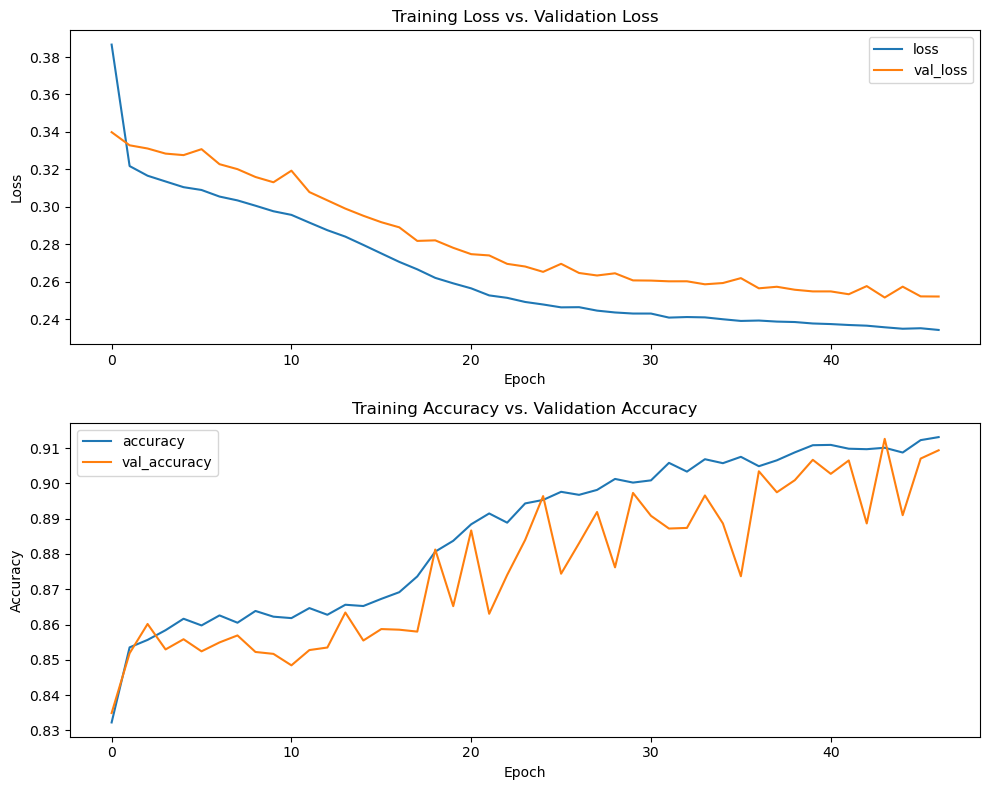

In [67]:
#Create subplots for loss and accuracy
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

#Plot loss and validation loss
metrics[['loss', 'val_loss']].plot(ax=axes[0])
axes[0].set_title('Training Loss vs. Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

#Plot accuracy and validation accuracy
metrics[['accuracy', 'val_accuracy']].plot(ax=axes[1])
axes[1].set_title('Training Accuracy vs. Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

#Adjust layout to avoid overlapping
plt.tight_layout()

#Show the plots
plt.show()


In [68]:
#Before tuning

test_loss, test_acc = ann.evaluate(val_set)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

87/87 [==============================] - 0s 274us/step - loss: 0.2516 - accuracy: 0.9126
Test loss: 0.2516
Test accuracy: 0.9126


In [69]:
#Tuning
ann_tuned = Sequential()
ann_tuned.add(Dense(units=60, activation='relu',input_shape=(X_train_new.shape[1:])))
ann_tuned.add(Dense(units=50, activation='relu'))
ann_tuned.add(Dense(units=1,activation='sigmoid'))

ann_tuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
callbacks1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
]

In [71]:
ann_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                780       
                                                                 
 dense_4 (Dense)             (None, 50)                3050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3881 (15.16 KB)
Trainable params: 3881 (15.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
#Model Train after tuning
batch=64

history_ann_seq_tuned= ann_tuned.fit(train_set,
                         validation_data= (val_set),
                         batch_size= batch,
                         epochs= 100,
                         callbacks= callbacks1
                         )

Epoch 1/100
347/347 [==============================] - 0s 579us/step - loss: 0.3757 - accuracy: 0.8327 - val_loss: 0.3390 - val_accuracy: 0.8409
Epoch 2/100
347/347 [==============================] - 0s 543us/step - loss: 0.3206 - accuracy: 0.8554 - val_loss: 0.3343 - val_accuracy: 0.8353
Epoch 3/100
347/347 [==============================] - 0s 463us/step - loss: 0.3168 - accuracy: 0.8548 - val_loss: 0.3298 - val_accuracy: 0.8542
Epoch 4/100
347/347 [==============================] - 0s 433us/step - loss: 0.3138 - accuracy: 0.8580 - val_loss: 0.3288 - val_accuracy: 0.8533
Epoch 5/100
347/347 [==============================] - 0s 497us/step - loss: 0.3128 - accuracy: 0.8556 - val_loss: 0.3288 - val_accuracy: 0.8533
Epoch 6/100
347/347 [==============================] - 0s 454us/step - loss: 0.3117 - accuracy: 0.8545 - val_loss: 0.3296 - val_accuracy: 0.8486
Epoch 7/100
347/347 [==============================] - 0s 440us/step - loss: 0.3112 - accuracy: 0.8550 - val_loss: 0.3268 - val_ac

In [73]:
metrics_tuned = pd.DataFrame(history_ann_seq_tuned.history)
metrics_tuned.head()

,loss,accuracy,val_loss,val_accuracy
0,0.375679,0.832665,0.339045,0.840872
1,0.320641,0.855373,0.334345,0.835286
2,0.316761,0.854787,0.329809,0.854208
3,0.313784,0.858031,0.328751,0.853307
4,0.312823,0.855643,0.328766,0.853307


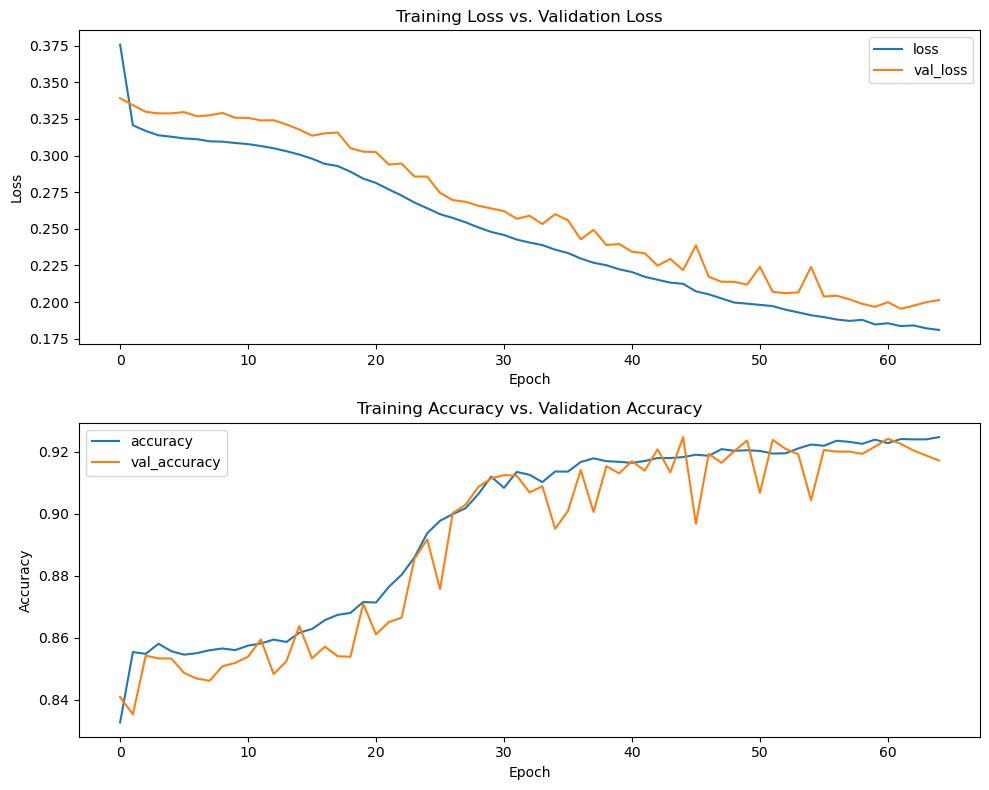

In [74]:
#Create subplots for loss and accuracy after tuning
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

#Plot loss and validation loss
metrics_tuned[['loss', 'val_loss']].plot(ax=axes[0])
axes[0].set_title('Training Loss vs. Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

#Plot accuracy and validation accuracy
metrics_tuned[['accuracy', 'val_accuracy']].plot(ax=axes[1])
axes[1].set_title('Training Accuracy vs. Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')

#Adjust layout to avoid overlapping
plt.tight_layout()

#Show the plots
plt.show()


In [75]:
#After tuning
test_loss, test_acc = ann_tuned.evaluate(val_set)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

87/87 [==============================] - 0s 367us/step - loss: 0.1954 - accuracy: 0.9225
Test loss: 0.1954
Test accuracy: 0.9225


In [76]:
y_test.shape

(9248,)

694/694 [==============================] - 0s 247us/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10188
           1       0.93      0.94      0.93     12007

    accuracy                           0.93     22195
   macro avg       0.93      0.93      0.93     22195
weighted avg       0.93      0.93      0.93     22195



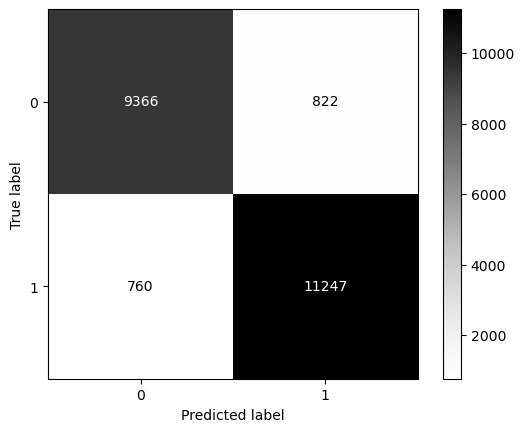

In [77]:
#Model Evaluation of train-set
y_pred_sq_tr = ann_tuned.predict(X_train_new)
y_pred_sq_tr = np.where(y_pred_sq_tr >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_sq_tr))

#Confusion matrix
cm = confusion_matrix(y_train, y_pred_sq_tr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()
     

289/289 [==============================] - 0s 290us/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4245
           1       0.93      0.94      0.93      5003

    accuracy                           0.93      9248
   macro avg       0.93      0.93      0.93      9248
weighted avg       0.93      0.93      0.93      9248



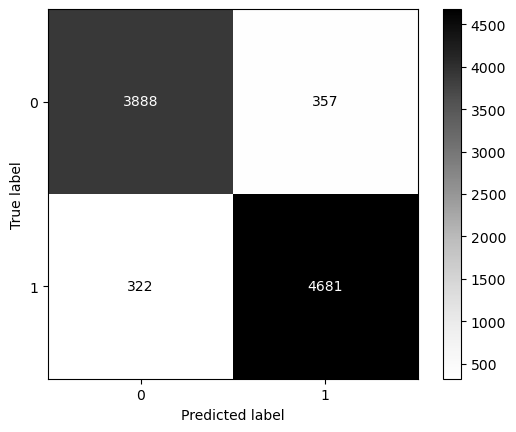

In [78]:
#Model Evaluation of test-set
y_pred_sq = ann_tuned.predict(X_test_new)
y_pred_sq = np.where(y_pred_sq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_sq))

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_sq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()
     

The confusion matrix obtained from the sequential training and testing indicates that the accuracy scores for both sets are the same. This suggests that the sequential model has achieved a balanced fit between the training and testing data, without overfitting or underfitting. The accuracy score, which represents the proportion of correctly classified instances, is consistent for both the training and testing datasets. This is a positive outcome as it shows that the model's performance is reliable and can generalize well to unseen data. A balanced fit between training and testing data is essential for creating a robust and dependable model, and this result provides confidence in the model's ability to make accurate predictions in real-world scenarios.

## Functional

In [79]:
#Functional
input_layer= tf.keras.Input(shape=(X_train_new.shape[1:]),name='input_layer')

hidden_1= Dense(30, activation='relu', name='hidden_1')(input_layer)
hidden_2= Dense(30, activation='relu', name='hidden_2')(hidden_1)
hidden_3= Dense(10, activation='relu', name='hidden_3')(hidden_2)
concat= tf.keras.layers.concatenate([input_layer,hidden_3])

output_layer= Dense(1, activation='sigmoid', name='output_layer')(concat)

model_func= Model(inputs=input_layer,
                  outputs=output_layer)

model_func.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 12)]                 0         []                            
                                                                                                  
 hidden_1 (Dense)            (None, 30)                   390       ['input_layer[0][0]']         
                                                                                                  
 hidden_2 (Dense)            (None, 30)                   930       ['hidden_1[0][0]']            
                                                                                                  
 hidden_3 (Dense)            (None, 10)                   310       ['hidden_2[0][0]']            
                                                                                              

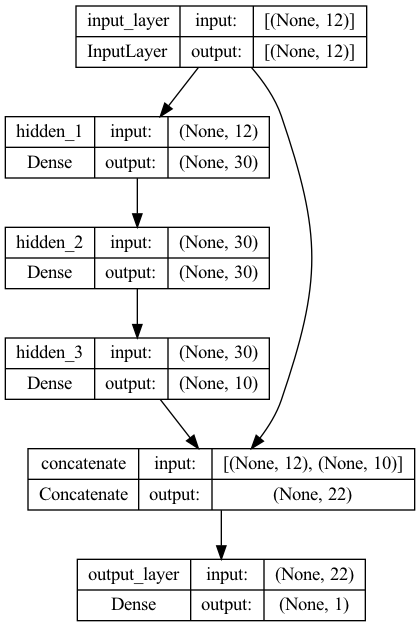

In [81]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

In [82]:
callbacks2= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True),
    ModelCheckpoint('model_best_func.hdf5', monitor='val_loss', save_best_only=True)
]

In [83]:
#training model
batch=32

history_ann_func= model_func.fit(train_set,
                        validation_data= (val_set),
                        # validation_split=0.2,
                         batch_size= batch,
                         epochs= 100,
                         )

Epoch 1/100
347/347 [==============================] - 0s 551us/step - loss: 0.3932 - accuracy: 0.8178 - val_loss: 0.3404 - val_accuracy: 0.8398
Epoch 2/100
347/347 [==============================] - 0s 461us/step - loss: 0.3220 - accuracy: 0.8538 - val_loss: 0.3320 - val_accuracy: 0.8515
Epoch 3/100
347/347 [==============================] - 0s 460us/step - loss: 0.3164 - accuracy: 0.8560 - val_loss: 0.3299 - val_accuracy: 0.8468
Epoch 4/100
347/347 [==============================] - 0s 439us/step - loss: 0.3143 - accuracy: 0.8583 - val_loss: 0.3292 - val_accuracy: 0.8556
Epoch 5/100
347/347 [==============================] - 0s 448us/step - loss: 0.3135 - accuracy: 0.8558 - val_loss: 0.3327 - val_accuracy: 0.8421
Epoch 6/100
347/347 [==============================] - 0s 460us/step - loss: 0.3115 - accuracy: 0.8579 - val_loss: 0.3269 - val_accuracy: 0.8587
Epoch 7/100
347/347 [==============================] - 0s 442us/step - loss: 0.3096 - accuracy: 0.8572 - val_loss: 0.3254 - val_ac

In [84]:
history_func_df = pd.DataFrame(history_ann_func.history)
history_func_df

,loss,accuracy,val_loss,val_accuracy
0,0.393205,0.817752,0.340431,0.839791
1,0.321983,0.853751,0.332044,0.851505
2,0.316444,0.855959,0.329917,0.846819
3,0.314299,0.858256,0.329151,0.855650
4,0.313506,0.855778,0.332653,0.842134
...,...,...,...,...
95,0.199108,0.916332,0.222711,0.904127
96,0.198513,0.917369,0.210756,0.908092
97,0.195035,0.919892,0.216066,0.903947
98,0.195213,0.918495,0.217872,0.909173


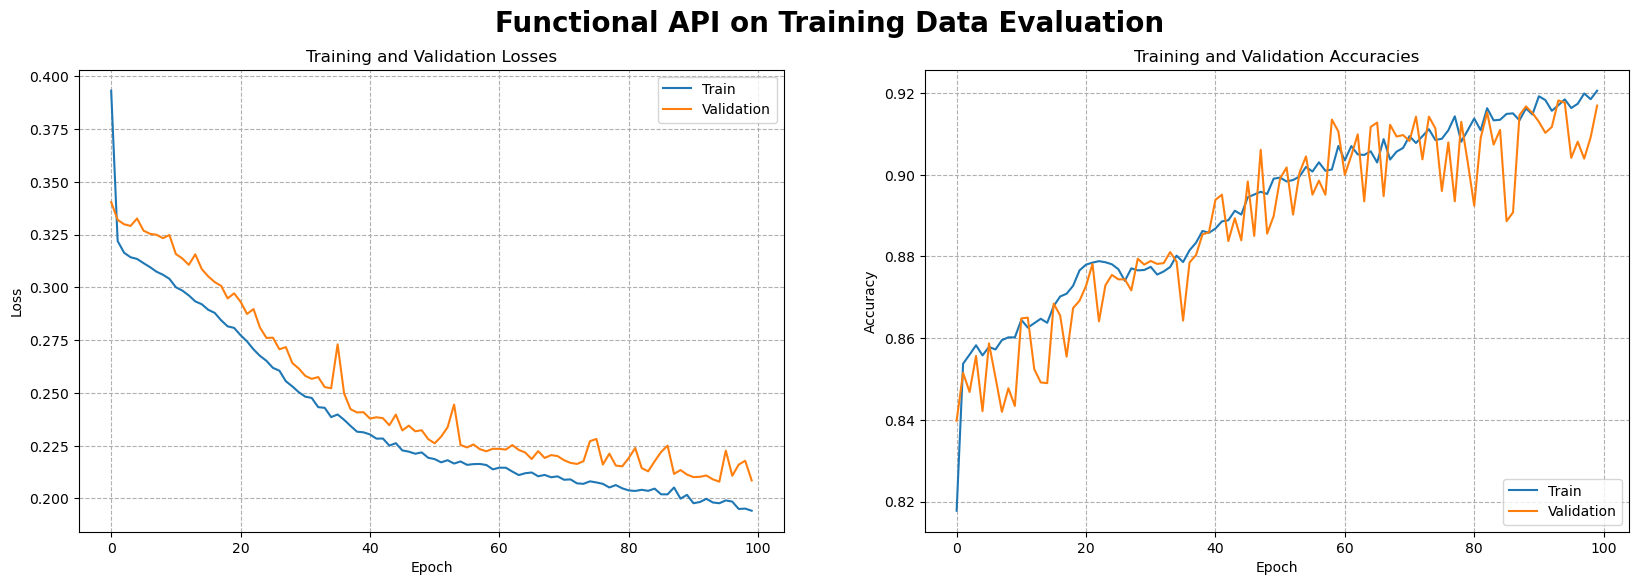

In [85]:
# Plot training & validation loss values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Functional API on Training Data Evaluation', fontsize=20, weight='bold')

plt.subplot(1, 2, 1)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_ann_func.history['loss'])
plt.plot(history_ann_func.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(linestyle='--')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.title("Training and Validation Accuracies", fontsize=12)
plt.plot(history_ann_func.history['accuracy'])
plt.plot(history_ann_func.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(linestyle='--')

plt.show()

In [86]:
test_loss, test_acc = model_func.evaluate(val_set)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

87/87 [==============================] - 0s 350us/step - loss: 0.2086 - accuracy: 0.9169
Test loss: 0.2086
Test accuracy: 0.9169


In [87]:
#Tuning - Functional

input_layer_imp = Input(X_train_new.shape[1:],)
hidden_layer1_imp = Dense(50, activation='relu')(input_layer_imp)
hidden_layer2_imp = Dense(50, activation='relu')(hidden_layer1_imp)
hidden_layer3_imp = Dense(3, activation='relu')(hidden_layer2_imp)


concat_layer_imp = tf.keras.layers.concatenate([input_layer_imp, hidden_layer3_imp])
output_layer_imp = Dense(1, activation='sigmoid')(concat_layer_imp)

func_tuned = Model(inputs=input_layer_imp, outputs=output_layer_imp)

#Compile
func_tuned.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

In [88]:
func_tuned.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 12)]                 0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 50)                   650       ['input_1[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 50)                   2550      ['dense_6[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 3)                    153       ['dense_7[0][0]']             
                                                                                            

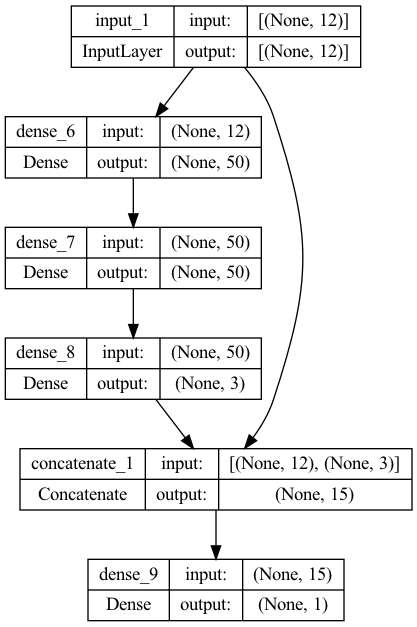

In [89]:
tf.keras.utils.plot_model(func_tuned, show_shapes=True)

In [90]:
#Train the Model
history_func_tuned = func_tuned.fit(train_set,
                                   epochs=100,
                                   validation_data= (val_set),
                                   batch_size=32
                                   )

Epoch 1/100
347/347 [==============================] - 0s 574us/step - loss: 0.4099 - accuracy: 0.8097 - val_loss: 0.3422 - val_accuracy: 0.8398
Epoch 2/100
347/347 [==============================] - 0s 461us/step - loss: 0.3203 - accuracy: 0.8543 - val_loss: 0.3391 - val_accuracy: 0.8365
Epoch 3/100
347/347 [==============================] - 0s 480us/step - loss: 0.3150 - accuracy: 0.8560 - val_loss: 0.3314 - val_accuracy: 0.8432
Epoch 4/100
347/347 [==============================] - 0s 456us/step - loss: 0.3126 - accuracy: 0.8563 - val_loss: 0.3296 - val_accuracy: 0.8452
Epoch 5/100
347/347 [==============================] - 0s 456us/step - loss: 0.3071 - accuracy: 0.8597 - val_loss: 0.3249 - val_accuracy: 0.8483
Epoch 6/100
347/347 [==============================] - 0s 466us/step - loss: 0.3024 - accuracy: 0.8592 - val_loss: 0.3165 - val_accuracy: 0.8529
Epoch 7/100
347/347 [==============================] - 0s 483us/step - loss: 0.2931 - accuracy: 0.8575 - val_loss: 0.3070 - val_ac

In [91]:
history_func_tuned_df = pd.DataFrame(history_ann_func.history)
history_func_tuned_df

,loss,accuracy,val_loss,val_accuracy
0,0.393205,0.817752,0.340431,0.839791
1,0.321983,0.853751,0.332044,0.851505
2,0.316444,0.855959,0.329917,0.846819
3,0.314299,0.858256,0.329151,0.855650
4,0.313506,0.855778,0.332653,0.842134
...,...,...,...,...
95,0.199108,0.916332,0.222711,0.904127
96,0.198513,0.917369,0.210756,0.908092
97,0.195035,0.919892,0.216066,0.903947
98,0.195213,0.918495,0.217872,0.909173


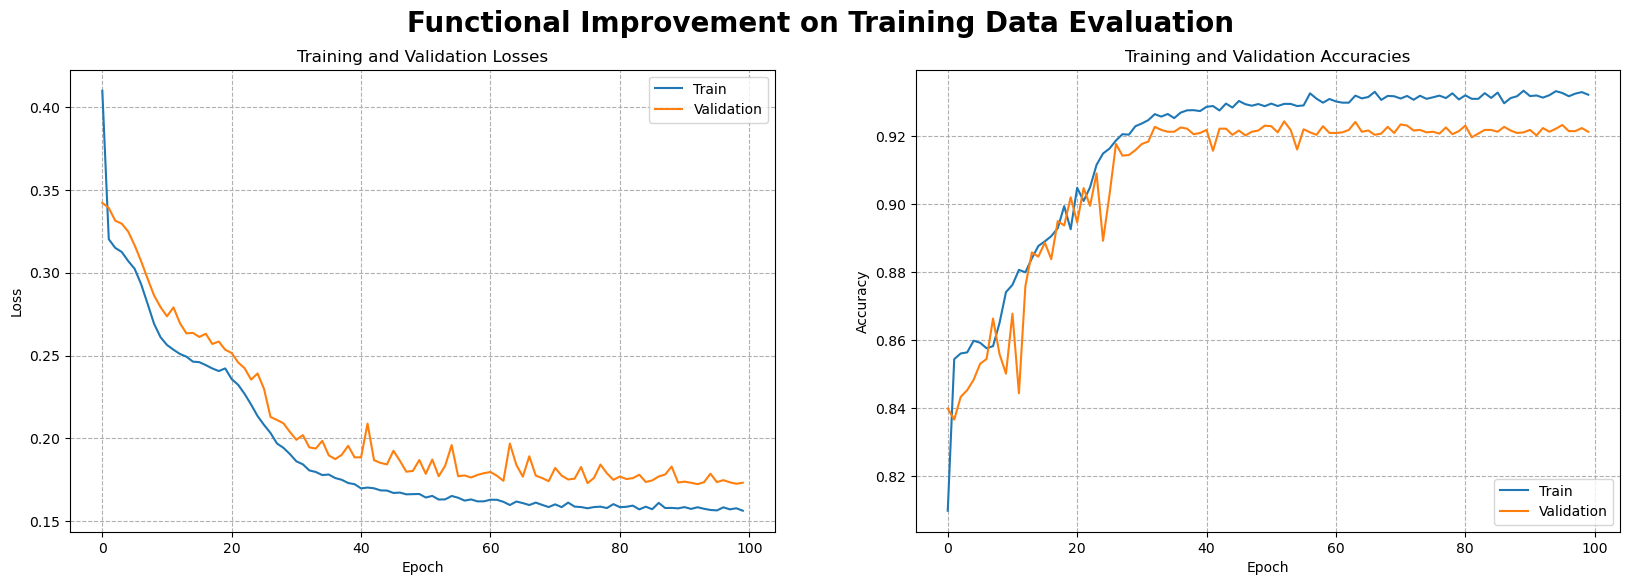

In [92]:
# Plot training & validation loss values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Functional Improvement on Training Data Evaluation', fontsize=20, weight='bold')

plt.subplot(1, 2, 1)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_func_tuned.history['loss'])
plt.plot(history_func_tuned.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(linestyle='--')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.title("Training and Validation Accuracies", fontsize=12)
plt.plot(history_func_tuned.history['accuracy'])
plt.plot(history_func_tuned.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(linestyle='--')

plt.show()

In [93]:
test_loss, test_acc = func_tuned.evaluate(val_set)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

87/87 [==============================] - 0s 829us/step - loss: 0.1732 - accuracy: 0.9212
Test loss: 0.1732
Test accuracy: 0.9212


694/694 [==============================] - 0s 244us/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     10188
           1       0.93      0.95      0.94     12007

    accuracy                           0.94     22195
   macro avg       0.94      0.93      0.93     22195
weighted avg       0.94      0.94      0.94     22195



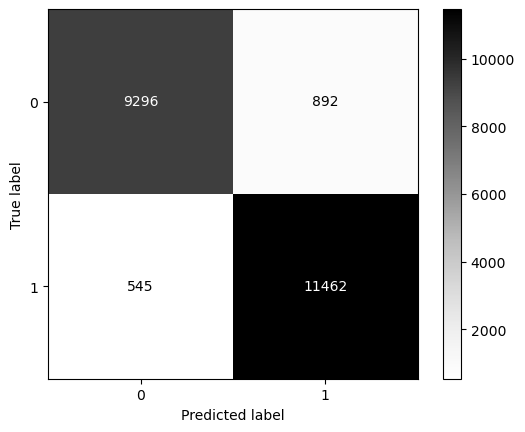

In [94]:
#Model Evaluation of train-set

y_pred_func_tuned_tr = func_tuned.predict(X_train_new)
y_pred_func_tuned_tr = np.where(y_pred_func_tuned_tr >= 0.5, 1, 0)

print(classification_report(y_train, y_pred_func_tuned_tr))

#Confusion matrix

cm = confusion_matrix(y_train, y_pred_func_tuned_tr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

  1/289 [..............................] - ETA: 3s

289/289 [==============================] - 0s 248us/step
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4245
           1       0.92      0.95      0.94      5003

    accuracy                           0.93      9248
   macro avg       0.93      0.93      0.93      9248
weighted avg       0.93      0.93      0.93      9248



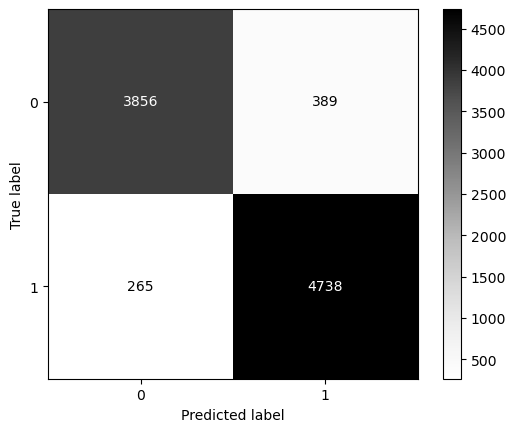

In [95]:
#Model Evaluation of test-set

y_pred_func_tuned = func_tuned.predict(X_test_new)
y_pred_func_tuned = np.where(y_pred_func_tuned >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_tuned))

#Confusion matrix

cm = confusion_matrix(y_test, y_pred_func_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

Based on the confusion matrix provided, it is evident that the accuracy scores for the test and train sets only differ by one. This indicates that the model has achieved a good fit and generalizes well to unseen data. The small difference between the accuracy scores suggests that the model is not overfitting to the training data and is performing well on both the training and testing datasets.

## Save Model

In [96]:
#Saving preprocess pipeline
joblib.dump(full_pipe, open('prepro_styleease.pkl', 'wb'))

In [97]:
#Saving Model
ann_tuned.save('ann_tuned_model.h5')

## Conclusion

In summary, the data analysis led to the creation of a deep learning model that predicts customers at risk of churning, enabling StyleEase to focus on retaining these customers.

The insights from the exploratory data analysis (EDA) provide valuable recommendations for StyleEase:
1. Prioritize Product Quality: Address the customer's main concern regarding poor product quality as a top priority. By offering high-quality products, StyleEase can enhance customer satisfaction and loyalty.

2. Enhance Customer Service: Improve customer service by training support teams and optimizing communication channels. Promptly resolving inquiries and addressing concerns will build trust and loyalty.

3. Optimize Website Experience: Since customers spend considerable time on the website, ensure a seamless and user-friendly experience through usability tests and feedback. This will lead to higher engagement and conversion rates.

4. Optimize Advertisements: Balance marketing efforts and customer satisfaction by evaluating ad placement and frequency. Deliver relevant and personalized content to avoid overwhelming customers.

5. Implement Loyalty Rewards: Introduce a loyalty program that rewards customers for accumulating points in their wallets. Exclusive offers and personalized benefits will incentivize repeat purchases and foster engagement.

6. Proactively Retain Customers: Utilize the deep learning model to predict customers at risk of churning. Implement targeted retention strategies like personalized offers and proactive outreach to encourage customer loyalty.

7. Foster Continuous Feedback: Establish a feedback loop with customers through surveys and reviews. Analyzing this feedback will aid in refining products and services over time.

By following these recommendations, StyleEase can create a positive customer experience, improve retention rates, enhance brand reputation, and foster sustainable business growth.

As for the deep learning model, try to consider experimenting with various architectural configurations, activation functions, and optimizers. Adjusting the learning rate and implementing regularization techniques like dropout can prevent overfitting. Additionally, use learning rate scheduling, early stopping, and data augmentation to optimize training and improve generalization. Explore feature engineering to enrich the dataset and consider ensemble models for combining predictions from multiple models. Lastly, conduct hyperparameter tuning to find the most effective combination of parameters. Continuously iterate and evaluate the model's performance to achieve better results.